In [1]:
%matplotlib inline
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("data/ad2.csv")

In [3]:
df.columns

Index(['Start Date', 'End Date', 'Campaign Name', 'Ad Group Name', 'Targeting',
       'Match Type', 'Customer Search Term', 'Impressions', 'Clicks',
       'Click-Thru Rate (CTR)', 'Cost Per Click (CPC)', '7 Day Total Sales ',
       'Spend', 'Total Advertising Cost of Sales (ACoS) ',
       'Total Return on Advertising Spend (RoAS)', 'Number of Days', 'Key',
       'Short Key', 'Impressions Per Day', 'Spend Per Day', 'Sales Per Day'],
      dtype='object')

In [4]:
#Top search terms to reasess
zero = df.loc[df['Total Advertising Cost of Sales (ACoS) '] == '0']
zero
zero_df = zero.sort_values(by='Spend', ascending=False).head(10)
zero_df

,Start Date,End Date,Campaign Name,Ad Group Name,Targeting,Match Type,Customer Search Term,Impressions,Clicks,Click-Thru Rate (CTR),Cost Per Click (CPC),7 Day Total Sales,Spend,Total Advertising Cost of Sales (ACoS),Total Return on Advertising Spend (RoAS),Number of Days,Key,Short Key,Impressions Per Day,Spend Per Day,Sales Per Day
376,26-May-21,19-Jun-21,Floral,Exact Ad Group,bamboo toddler plates,EXACT,bamboo toddler plates,757,33,4.36%,2.15,0.0,70.82,0,0.0,24,bamboo toddler plates Floral Exact Ad Group ba...,bamboo toddler plates Floral,31.541667,2.950833,0.0
328,5-Jun-21,19-Jun-21,Floral,ASIN,"asin=""B08F2PR7JS""",-,b08f2pr7js,5157,40,0.78%,0.76,0.0,30.31,0,0.0,14,"b08f2pr7js Floral ASIN asin=""B08F2PR7JS""",b08f2pr7js Floral,368.357143,2.165000,0.0
357,27-May-21,17-Jun-21,Floral,Exact Ad Group,plates for kids,EXACT,plates for kids,713,17,2.38%,1.73,0.0,29.47,0,0.0,21,plates for kids Floral Exact Ad Group plates f...,plates for kids Floral,33.952381,1.403333,0.0
270,25-May-21,12-Jun-21,Rainforest,Exact Ad Group,plates for kids,EXACT,plates for kids,664,15,2.26%,1.83,0.0,27.42,0,0.0,18,plates for kids Rainforest Exact Ad Group plat...,plates for kids Rainforest,36.888889,1.523333,0.0
342,25-May-21,16-Jun-21,Floral,ASIN,"asin=""B07KYWP2MT""",-,b07kywp2mt,3552,24,0.68%,0.98,0.0,23.48,0,0.0,22,"b07kywp2mt Floral ASIN asin=""B07KYWP2MT""",b07kywp2mt Floral,161.454545,1.067273,0.0
314,27-May-21,17-Jun-21,Floral,ASIN,"asin=""B01MG7OE9X""",-,b01mg7oe9x,2136,28,1.31%,0.82,0.0,23.08,0,0.0,21,"b01mg7oe9x Floral ASIN asin=""B01MG7OE9X""",b01mg7oe9x Floral,101.714286,1.099048,0.0
257,26-May-21,12-Jun-21,Rainforest,ASIN,"asin=""B07DD9WBZW""",-,b07dd9wbzw,1011,18,1.78%,1.12,0.0,20.19,0,0.0,17,"b07dd9wbzw Rainforest ASIN asin=""B07DD9WBZW""",b07dd9wbzw Rainforest,59.470588,1.187647,0.0
163,25-May-21,27-May-21,Rainforest,Broad Ad Group,kids plates and bowls,BROAD,kids plates and bowls sets,4271,15,0.35%,1.31,0.0,19.69,0,0.0,2,kids plates and bowls sets Rainforest Broad Ad...,kids plates and bowls sets Rainforest,2135.500000,9.845000,0.0
520,28-May-21,8-Jun-21,Floral,Exact Ad Group,toddler bowls,EXACT,toddler bowls,675,11,1.63%,1.76,0.0,19.40,0,0.0,11,toddler bowls Floral Exact Ad Group toddler bowls,toddler bowls Floral,61.363636,1.763636,0.0
229,25-May-21,11-Jun-21,Rainforest,ASIN,"asin=""B07KYWP2MT""",-,b07kywp2mt,3495,21,0.60%,0.84,0.0,17.57,0,0.0,17,"b07kywp2mt Rainforest ASIN asin=""B07KYWP2MT""",b07kywp2mt Rainforest,205.588235,1.033529,0.0


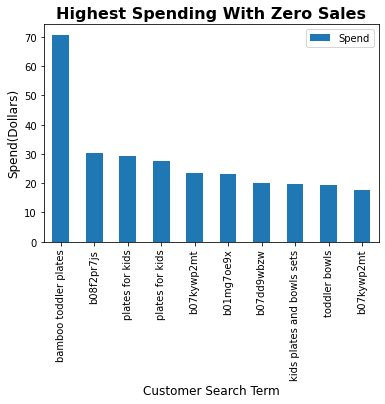

<Figure size 432x288 with 0 Axes>

In [5]:
ax = zero_df.plot.bar(x='Customer Search Term', y='Spend', rot=90)
ax.set_xlabel("Customer Search Term", fontsize=12)
ax.set_ylabel("Spend(Dollars)", fontsize=12)
ax.set_title("Highest Spending With Zero Sales", fontsize=16, fontweight="bold")
plt.show()
plt.savefig('images\zero.png')

In [6]:
df['ACos'] = df['Spend']/df['7 Day Total Sales ']
df['RoAS'] = df['7 Day Total Sales ']/df['Spend']
df

,Start Date,End Date,Campaign Name,Ad Group Name,Targeting,Match Type,Customer Search Term,Impressions,Clicks,Click-Thru Rate (CTR),Cost Per Click (CPC),7 Day Total Sales,Spend,Total Advertising Cost of Sales (ACoS),Total Return on Advertising Spend (RoAS),Number of Days,Key,Short Key,Impressions Per Day,Spend Per Day,Sales Per Day,ACos,RoAS
0,29-May-21,29-May-21,Rainforest,Broad Ad Group,bamboo kids plates,BROAD,bamboo kids plate set,2,1,50.00%,1.15,0.00,1.15,0,0.00,1,bamboo kids plate set Rainforest Broad Ad Grou...,bamboo kids plate set Rainforest,2.000000,1.150000,0.000000,inf,0.000000
1,31-May-21,9-Jun-21,Rainforest,Broad Ad Group,bamboo kids plates,BROAD,bamboo kids plates and bowl sets,222,10,4.50%,1.50,49.98,15.01,30.03%,3.33,9,bamboo kids plates and bowl sets Rainforest Br...,bamboo kids plates and bowl sets Rainforest,24.666667,1.667778,5.553333,0.30032,3.329780
2,26-May-21,26-May-21,Rainforest,Broad Ad Group,bamboo kids plates,BROAD,bamboo plate set kids,7,1,14.29%,2.47,0.00,2.47,0,0.00,1,bamboo plate set kids Rainforest Broad Ad Grou...,bamboo plate set kids Rainforest,7.000000,2.470000,0.000000,inf,0.000000
3,29-May-21,29-May-21,Rainforest,Broad Ad Group,bamboo kids plates,BROAD,grow forward kids bamboo plates and bowl sets,8,1,12.50%,1.98,0.00,1.98,0,0.00,1,grow forward kids bamboo plates and bowl sets ...,grow forward kids bamboo plates and bowl sets ...,8.000000,1.980000,0.000000,inf,0.000000
4,11-Jun-21,11-Jun-21,Rainforest,Broad Ad Group,bamboo kids plates,BROAD,kids 10 inch dinner plate bamboo,1,1,100.00%,1.61,0.00,1.61,0,0.00,1,kids 10 inch dinner plate bamboo Rainforest Br...,kids 10 inch dinner plate bamboo Rainforest,1.000000,1.610000,0.000000,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,19-Jun-21,19-Jun-21,Floral,Ultimate,*,-,b08njz1xy9,1,1,100.00%,0.04,0.00,0.04,0,0.00,1,b08njz1xy9 Floral Ultimate *,b08njz1xy9 Floral,1.000000,0.040000,0.000000,inf,0.000000
562,3-Jun-21,3-Jun-21,Floral,Ultimate,*,-,b08x653v74,1,1,100.00%,0.15,0.00,0.15,0,0.00,1,b08x653v74 Floral Ultimate *,b08x653v74 Floral,1.000000,0.150000,0.000000,inf,0.000000
563,30-May-21,15-Jun-21,Floral,Ultimate,*,-,grow forward,21,5,23.81%,0.12,24.99,0.62,2.48%,40.31,16,grow forward Floral Ultimate *,grow forward Floral,1.312500,0.038750,1.561875,0.02481,40.306452
564,3-Jun-21,3-Jun-21,Floral,Ultimate,*,-,grow+forward,1,1,100.00%,0.24,0.00,0.24,0,0.00,1,grow+forward Floral Ultimate *,grow+forward Floral,1.000000,0.240000,0.000000,inf,0.000000


In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [8]:
ACos = df.sort_values(by='ACos', ascending=False).head(20)
RoAS = df.sort_values(by='RoAS', ascending=False).head(20)

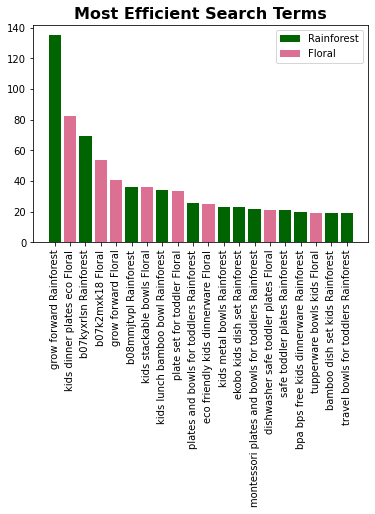

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

colors = {'Rainforest':'darkgreen', 'Floral':'palevioletred'}
c = RoAS['Campaign Name'].apply(lambda x: colors[x])


ax = plt.subplot(111) #specify a subplot

bars = ax.bar(RoAS['Short Key'], RoAS['RoAS'], color=c) #Plot data on subplot axis

for i, j in colors.items(): #Loop over color dictionary
    ax.bar(RoAS['Short Key'], RoAS['RoAS'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

ax.set_title("Most Efficient Search Terms", fontsize=16, fontweight="bold")    
    
plt.xticks(rotation = 90)
    
ax.legend()

plt.show()


In [10]:
ACos

,Start Date,End Date,Campaign Name,Ad Group Name,Targeting,Match Type,Customer Search Term,Impressions,Clicks,Click-Thru Rate (CTR),Cost Per Click (CPC),7 Day Total Sales,Spend,Total Advertising Cost of Sales (ACoS),Total Return on Advertising Spend (RoAS),Number of Days,Key,Short Key,Impressions Per Day,Spend Per Day,Sales Per Day,ACos,RoAS
366,26-May-21,17-Jun-21,Floral,Exact Ad Group,toddler bowls and plates,EXACT,toddler bowls and plates,454,22,4.85%,2.05,24.99,45.15,180.67%,0.55,22,toddler bowls and plates Floral Exact Ad Group...,toddler bowls and plates Floral,20.636364,2.052273,1.135909,1.806723,0.553488
515,28-May-21,7-Jun-21,Rainforest,Exact Ad Group,toddler bowls,EXACT,toddler bowls,1024,15,1.46%,1.71,24.99,25.68,102.76%,0.97,10,toddler bowls Rainforest Exact Ad Group toddle...,toddler bowls Rainforest,102.400000,2.568000,2.499000,1.027611,0.973131
361,28-May-21,17-Jun-21,Floral,Exact Ad Group,kids plates,EXACT,kids plate,1118,13,1.16%,1.83,24.99,23.77,95.12%,1.05,20,kids plate Floral Exact Ad Group kids plates,kids plate Floral,55.900000,1.188500,1.249500,0.951180,1.051325
212,29-May-21,9-Jun-21,Rainforest,ASIN,"asin=""B0757H6FSM""",-,b0757h6fsm,1170,17,1.45%,1.36,24.99,23.16,92.68%,1.08,11,"b0757h6fsm Rainforest ASIN asin=""B0757H6FSM""",b0757h6fsm Rainforest,106.363636,2.105455,2.271818,0.926771,1.079016
325,25-May-21,13-Jun-21,Floral,ASIN,"asin=""B07FP3NYST""",-,b07fp3nyst,7693,56,0.73%,0.79,49.98,44.06,88.16%,1.13,19,"b07fp3nyst Floral ASIN asin=""B07FP3NYST""",b07fp3nyst Floral,404.894737,2.318947,2.630526,0.881553,1.134362
513,27-May-21,8-Jun-21,Rainforest,Exact Ad Group,kids plates and bowls,EXACT,kids plates and bowls,561,15,2.67%,1.43,24.99,21.50,86.03%,1.16,12,kids plates and bowls Rainforest Exact Ad Grou...,kids plates and bowls Rainforest,46.750000,1.791667,2.082500,0.860344,1.162326
347,27-May-21,19-Jun-21,Floral,ASIN,"asin=""B08GP9CWXR""",-,b08gp9cwxr,1548,35,2.26%,1.19,49.98,41.81,83.65%,1.20,23,"b08gp9cwxr Floral ASIN asin=""B08GP9CWXR""",b08gp9cwxr Floral,67.304348,1.817826,2.173043,0.836535,1.195408
235,28-May-21,12-Jun-21,Rainforest,ASIN,"asin=""B08GPDXNN4""",-,b08gpdxnn4,833,25,3.00%,0.82,24.99,20.58,82.35%,1.21,15,"b08gpdxnn4 Rainforest ASIN asin=""B08GPDXNN4""",b08gpdxnn4 Rainforest,55.533333,1.372000,1.666000,0.823529,1.214286
337,27-May-21,15-Jun-21,Floral,ASIN,"asin=""B0757GLR1F""",-,b0757glr1f,1268,17,1.34%,1.21,24.99,20.50,82.03%,1.22,19,"b0757glr1f Floral ASIN asin=""B0757GLR1F""",b0757glr1f Floral,66.736842,1.078947,1.315263,0.820328,1.219024
213,2-Jun-21,12-Jun-21,Rainforest,ASIN,"asin=""B08F2PR7JS""",-,b08f2pr7js,4182,43,1.03%,0.90,49.98,38.56,77.15%,1.30,10,"b08f2pr7js Rainforest ASIN asin=""B08F2PR7JS""",b08f2pr7js Rainforest,418.200000,3.856000,4.998000,0.771509,1.296162


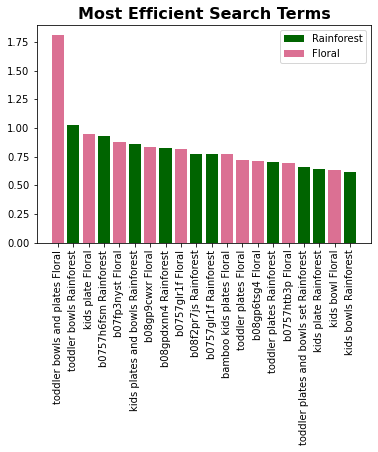

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

colors = {'Rainforest':'darkgreen', 'Floral':'palevioletred'}
c = ACos['Campaign Name'].apply(lambda x: colors[x])


ax = plt.subplot(111) #specify a subplot

bars = ax.bar(ACos['Short Key'], ACos['ACos'], color=c) #Plot data on subplot axis

for i, j in colors.items(): #Loop over color dictionary
    ax.bar(ACos['Short Key'], ACos['ACos'],width=0,color=j,label=i) #Plot invisible bar graph but have the legends specified

ax.set_title("Most Efficient Search Terms", fontsize=16, fontweight="bold")    
    
plt.xticks(rotation = 90)
    
ax.legend()

plt.show()

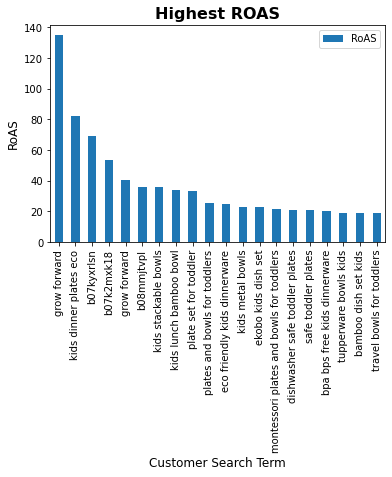

In [12]:
ax = RoAS.plot.bar(x='Customer Search Term', y='RoAS', rot=90)
ax.set_xlabel("Customer Search Term", fontsize=12)
ax.set_ylabel("RoAS", fontsize=12)
ax.set_title("Highest ROAS", fontsize=16, fontweight="bold")
plt.show()

In [ ]:
sns.barplot(x = 'Customer Search Term', y = 'RoAS', hue = 'Campaign Name', data = RoAS)
plt.show()

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'Customer Search Term', y = 'RoAS', hue = 'Campaign Name', data = RoAS)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [ ]:
ax = sns.barplot(x = 'Customer Search Term', y = 'RoAS', hue = 'Campaign Name', data = RoAS)

In [ ]:
plt.figure(figsize=(12, 10))
sns.regplot(df['Spend'], df['7 Day Total Sales '])


In [ ]:
plt.figure(figsize=(12, 10))
sns.regplot(df['Spend Per Day'], df['Sales Per Day'])
plt.savefig('images\sales-spending.png')

In [ ]:
plt.figure(figsize=(12, 10))
sns.regplot(df['Spend Per Day'], df['Impressions Per Day'])
plt.savefig('images\impressions-spending.png')

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Spend Per Day'],df['Impressions Per Day'])
ax = sns.regplot(x='Spend Per Day', y = 'Impressions Per Day', data = df, color='Purple',
                line_kws={'label':"y={0:1f}x+{1:1f}".format(slope,intercept)})
ax.legend()

plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Spend Per Day'],df['Sales Per Day'])
ax = sns.regplot(x='Spend Per Day', y = 'Sales Per Day', data = df, color='Blue',
                line_kws={'label':"y={0:1f}x+{1:1f}".format(slope,intercept)})
ax.legend()

plt.show()

In [ ]:
res = stats.linregress(df['Spend Per Day'],df['Impressions Per Day'])
print(f"R-squared: {res.rvalue**2:.6f}")

In [ ]:
plt.plot(df['Spend Per Day'],df['Sales Per Day'], 'o', label='original data')
plt.plot(df['Spend Per Day'], res.intercept + res.slope*df['Spend Per Day'], 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
X=df['Spend Per Day']
Y=df['Impressions Per Day']
X

In [ ]:
from scipy.stats import linregress
X = df['Spend Per Day'].values
Y = df['Impressions Per Day'].values
linregress(X, Y)

In [ ]:
corr = df.loc[df['Campaign Name'] == 'Floral - Manual'].corr()[['Spend Per Day']]
corr = corr.sort_values(by='Spend Per Day', ascending=False)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.savefig('images\heatmap.png')


In [ ]:
df

In [ ]:
sns.lmplot(data=df, x='Spend Per Day', y='Total Advertising Cost of Sales (ACoS) ', hue='Campaign Name', height=7)

In [ ]:
df

In [ ]:
plt.figure(figsize=(12, 10))
sns.regplot(df['7 Day Total Sales '], df['Impressions Per Day'])


In [ ]:
plt.figure(figsize=(12, 10))
sns.regplot(df['7 Day Total Sales '], df['Clicks'])


In [ ]:
df['Campaign Name'].value_counts()

In [ ]:
df.loc[df['Campaign Name'].str.contains('Rainforest'), 'Campaign Name'] = "Rainforest"
df.loc[df['Campaign Name'].str.contains('Floral'), 'Campaign Name'] = "Floral"



In [ ]:
grid = df[['Campaign Name','Impressions Per Day','Spend Per Day','Sales Per Day','Clicks','Click-Thru Rate (CTR)']]

In [ ]:
sns.pairplot(grid, hue="Campaign Name", markers=["o", "s"])

In [ ]:
sns.relplot(x="Spend Per Day", y="Sales Per Day",
            col="Campaign Name", data=grid);

In [ ]:
df.columns

In [ ]:
df['ACoS'] = df['Spend']/df['7 Day Total Sales ']

In [ ]:
df

In [ ]:
no_zero=df[(df != 0).all(1)]

In [ ]:
no_zero['ACoS'] = no_zero['Spend']/no_zero['7 Day Total Sales ']*100

In [ ]:
no_zero

In [ ]:
plt.figure(figsize=(12, 10))
sns.regplot(no_zero['Spend Per Day'], no_zero['ACoS'])